# Simple Linear Regression

problem statement:

Build a predictive linear regression model for given dataset, given humidity predict apparent temperature
https://drive.google.com/open?id=1WsJxbsh51SL1UhT0xEvNynZTKy4nOwLM

In [3]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np
#importing math module
import math
# loading csv data from the file given in the url
weather_data = pd.read_csv("weatherHistory.csv")
#prinding info of data
weather_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [5]:
#extracting humididty and temperature column from data set
index=round(len(weather_data['Humidity'])*0.7)
humidity = weather_data['Humidity']
train_humidity =humidity[:index]
temperature = weather_data['Temperature (C)']
train_temperature = temperature[:index]

test_humidity = humidity[index+1:]
test_temp = temperature[index+1:]

In [6]:
#checking null values in humidity and temperature
train_humidity.isnull().sum()

0

In [7]:
train_temperature.isnull().sum()

0

In [8]:
train_humidity

0        0.89
1        0.86
2        0.89
3        0.83
4        0.83
         ... 
67512    0.84
67513    0.80
67514    0.81
67515    0.78
67516    0.85
Name: Humidity, Length: 67517, dtype: float64

In [9]:
#obtaining mean of temp and humidity
mean_hum=train_humidity.mean()
mean_temp= train_temperature.mean()

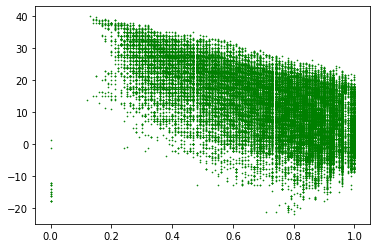

In [10]:
#plotting humoidity and temp
plt.scatter(train_humidity,train_temperature,s=0.4,color='g')

In [23]:
#function to calculate gradient descent
def gradient_descent(x,y):
    x = np.array(x)
    y = np.array(y)
    b0 = 0#33             #making or initializing y intercept 33 as seen in figure just to make less iterations
    b1 = 0#-31              #initially making  slope -31 as from figure just to make iterations less
    learning_rate = 0.01
    n = len(x)
    iterations =10000
    for i in range(iterations):
        predicted_temp=b0+b1*x
        cost_func_val = (1/(2*n))*sum([val**2 for val in (predicted_temp-y) ])
        b0_changed = (1/n)*sum(predicted_temp-y)
        b1_changed = (1/n)*(sum((predicted_temp-y)*x))
        b0 = b0 - (learning_rate * b0_changed)
        b1 = b1 - (learning_rate * b1_changed)
    return b0,b1#returning value of y intercept and slope

In [25]:
#obtaining value of gradient descent
gradient = gradient_descent(train_humidity,train_temperature)

In [26]:
#showing output
gradient      

(32.91293051037646, -29.078831197029512)

In [27]:
#defining a function to test the data set
def predict(test):
    b0 = gradient[0]#33.92549 #obtained gradient descent
    b1 = gradient[1]#-31.42468
    n = len(test)
    
    lis = []
    for i in range(n):
        y_pred = b0 + b1 * test[i]
        lis.append(y_pred)
    return lis  #predected values of y from test data

In [28]:
#obtaining value of predected temp
predicted_temp=predict(test_humidity.tolist())

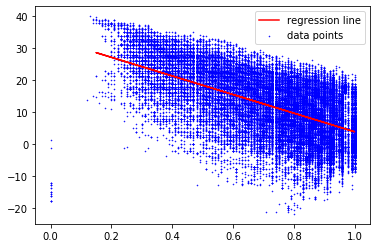

In [29]:
#plotting graph with regression line
figure = plt.subplot()
figure.plot(test_humidity,predicted_temp,color='r',label='regression line')
figure.scatter(train_humidity,train_temperature,s=0.3,color='b',label="data points")
figure.legend()

In [30]:
#determining accuracy 
def accuracy( y_data_test, y_pred_test):
        total_error = 0 
        for i in range(0, len(y_data_test)): 
            total_error += abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i]) 
            total_error = (total_error / len(y_data_test)) 
            accuracy = 1 - total_error 
            return accuracy.mean()*100

In [31]:
#determining accuracy and printing
accuracy(train_temperature, predicted_temp)

99.9996084740003